In [74]:
import pandas as pd

def bisect1(func, xl, xu, maxit=20):
    """
    Uses the bisection method to estimate a root of func(x).
    The method is iterated maxit (default = 20) times.
    Input:
        func = name of the function
        xl = lower guess
        xu = upper guess
    Output:
        xm = root estimate
        or
        error message if initial guesses do not bracket solution
    """
    if func(xl) * func(xu) > 0:
        return 'initial estimates do not bracket solution'
    
    results = []
    for i in range(maxit):
        xm = (xl + xu) / 2
        fxl = func(xl)
        fxu = func(xu)
        fxm = func(xm)
        results.append({'Iteration': i + 1, 'a (xl)': xl, 'b (xu)': xu, 'f(a)': fxl, 'f(b)': fxu, 'c (xm)': xm, 'f(c)': fxm})
        
        if fxm * fxl > 0:
            xl = xm
        else:
            xu = xm
    
    df = pd.DataFrame(results)
    return xm, df

In [75]:
import math

xm, df = bisect1(lambda x: math.sin(10*x) + math.cos(3*x), 3, 6)
df

,Iteration,a (xl),b (xu),f(a),f(b),c (xm),f(c)
0,1,3.000000,6.000000,-1.899162,0.355506,4.500000,1.445824
1,2,3.000000,4.500000,-1.899162,1.445824,3.750000,0.053891
2,3,3.000000,3.750000,-1.899162,0.053891,3.375000,-0.042125
3,4,3.375000,3.750000,-0.042125,0.053891,3.562500,-1.179212
4,5,3.562500,3.750000,-1.179212,0.053891,3.656250,-0.934034
5,6,3.656250,3.750000,-0.934034,0.053891,3.703125,-0.505753
6,7,3.703125,3.750000,-0.505753,0.053891,3.726562,-0.236963
7,8,3.726562,3.750000,-0.236963,0.053891,3.738281,-0.093535
8,9,3.738281,3.750000,-0.093535,0.053891,3.744141,-0.020223
9,10,3.744141,3.750000,-0.020223,0.053891,3.747070,0.016746


In [76]:
import pandas as pd

def bisect(func, xl, xu, es=1.e-7, maxit=30):
    """
    Uses the bisection method to estimate a root of func(x).
    The method is iterated until the relative error from
    one iteration to the next falls below the specified
    value or until the maximum number of iterations is
    reached first.
    Input:
        func = name of the function
        xl = lower guess
        xu = upper guess
        es = relative error specification (default 1.e-7)
        maxit = maximum number of iterations allowed (default 30)
    Output:
        xm = root estimate
        fm = function value at the root estimate
        ea = actual relative error achieved
        i+1 = number of iterations required
        or
        error message if initial guesses do not bracket solution
    """
    if func(xl) * func(xu) > 0:
        return 'Initial estimates do not bracket solution'
    
    results = []
    xmold = xl
    for i in range(maxit):
        xm = (xl + xu) / 2
        fxl = func(xl)
        fxu = func(xu)
        fxm = func(xm)
        ea = abs((xm - xmold) / xm)
        results.append({'Iteration': i + 1, 'a (xl)': xl, 'b (xu)': xu, 'f(a)': fxl, 'f(b)': fxu, 'c (xm)': xm, 'f(c)': fxm, 'Error (ea)': ea})
        
        if ea < es:
            break
        if fxm * fxl > 0:
            xl = xm
        else:
            xu = xm
        xmold = xm
    
    df = pd.DataFrame(results)
    return xm, func(xm), ea, i+1, df

In [79]:
xm, f, ea, i, df = bisect(lambda x: math.sin(10*x) + math.cos(3*x), 3, 4)
df

,Iteration,a (xl),b (xu),f(a),f(b),c (xm),f(c),Error (ea)
0,1,3.000000,4.000000,-1.899162,1.588967,3.500000,-0.903720,1.428571e-01
1,2,3.500000,4.000000,-0.903720,1.588967,3.750000,0.053891,6.666667e-02
2,3,3.500000,3.750000,-0.903720,0.053891,3.625000,-1.112888,3.448276e-02
3,4,3.625000,3.750000,-1.112888,0.053891,3.687500,-0.667069,1.694915e-02
4,5,3.687500,3.750000,-0.667069,0.053891,3.718750,-0.329598,8.403361e-03
5,6,3.718750,3.750000,-0.329598,0.053891,3.734375,-0.141866,4.184100e-03
6,7,3.734375,3.750000,-0.141866,0.053891,3.742188,-0.044759,2.087683e-03
7,8,3.742188,3.750000,-0.044759,0.053891,3.746094,0.004402,1.042753e-03
8,9,3.742188,3.746094,-0.044759,0.004402,3.744141,-0.020223,5.216484e-04
9,10,3.744141,3.746094,-0.020223,0.004402,3.745117,-0.007921,2.607562e-04


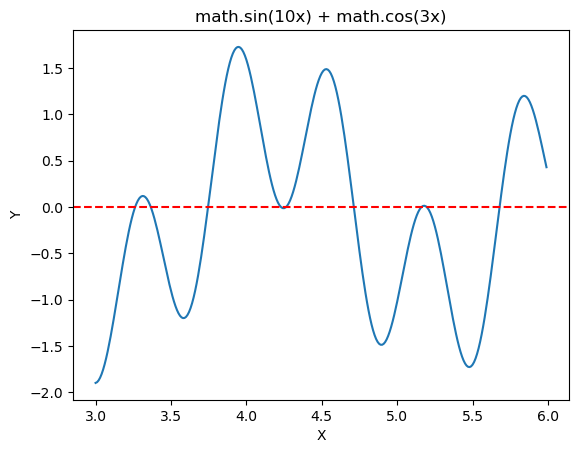

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

# Define the equation
def equation(x):
  return np.sin(10 * x) + np.cos(3 * x)

# Create x values for the plot
x = np.arange(3, 6, 0.01)  # Adjust range and step size as needed

# Calculate y values using the equation
y = equation(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('math.sin(10x) + math.cos(3x)')

# Add a straight line at y=0
plt.axhline(0, color='red', linestyle='--')

# Show the updated plot
plt.show()

In [64]:
import pandas as pd

def regula_falsi(func, xl, xu, es=1.e-7, maxit=10):
    """
    Uses the regula falsi method to estimate a root of func(x).
    The method is iterated until the relative error from
    one iteration to the next falls below the specified
    value or until the maximum number of iterations is
    reached first.
    Input:
        func = name of the function
        xl = lower guess
        xu = upper guess
        es = relative error specification (default 1.e-7)
        maxit = maximum number of iterations allowed (default 10)
    Output:
        xm = root estimate
        fm = function value at the root estimate
        ea = actual relative error achieved
        i+1 = number of iterations required
        or
        error message if initial guesses do not bracket solution
    """
    if func(xl) * func(xu) > 0:
        return 'Initial estimates do not bracket solution'
    
    results = []
    xmold = xl
    for i in range(maxit):
        xm = (func(xu) * xl - func(xl) * xu) / (func(xu) - func(xl))
        fxl = func(xl)
        fxu = func(xu)
        fxm = func(xm)
        ea = abs((xm - xmold) / xm)
        results.append({'Iteration': i + 1, 'a (xl)': xl, 'b (xu)': xu, 'f(a)': fxl, 'f(b)': fxu, 'c (xm)': xm, 'f(c)': fxm, 'Error (ea)': ea})
        
        if ea < es:
            break
        if fxm * fxl > 0:
            xl = xm
        else:
            xu = xm
        xmold = xm
    
    df = pd.DataFrame(results)
    return xm, func(xm), ea, i+1, df


In [69]:
xm, f, ea, i, df = regula_falsi(lambda x: x**3 - 2*(x**2) + 6*x - 4, 0, 1, 1e-4, 10)
df

,Iteration,a (xl),b (xu),f(a),f(b),c (xm),f(c),Error (ea)
0,1,0,1.000000,-4,1.000000,0.800000,0.032000,1.000000
1,2,0,0.800000,-4,0.032000,0.793651,0.002048,0.008000
2,3,0,0.793651,-4,0.002048,0.793245,0.000133,0.000512
3,4,0,0.793245,-4,0.000133,0.793218,0.000009,0.000033


In [48]:
regula_falsi(lambda x: math.sin(10*x) + math.cos(3*x), 3, 4)

,Iteration,a (xl),b (xu),f(a),f(b),c (xm),f(c),Error (ea)
0,1,3.000000,4.00000,-1.899162e+00,1.588967,3.544464,-1.129573e+00,1.536098e-01
1,2,3.544464,4.00000,-1.129573e+00,1.588967,3.733743,-1.496430e-01,5.069401e-02
2,3,3.733743,4.00000,-1.496430e-01,1.588967,3.756660,1.388457e-01,6.100337e-03
3,4,3.733743,3.75666,-1.496430e-01,0.138846,3.745630,-1.452125e-03,2.944655e-03
4,5,3.745630,3.75666,-1.452125e-03,0.138846,3.745744,-1.131909e-05,3.047714e-05
5,6,3.745744,3.75666,-1.131909e-05,0.138846,3.745745,-8.802935e-08,2.375452e-07
6,7,3.745745,3.75666,-8.802935e-08,0.138846,3.745745,-6.846008e-10,1.847405e-09


In [4]:
import pandas as pd
import math

def newton_raphson(func, deriv, x0, tol=1e-7, max_iter=100):
    """
    Implements the Newton-Raphson method to find the root of a function.
    Input:
        func: the function for which the root is to be found
        deriv: the derivative of the function
        x0: initial guess for the root
        tol: tolerance for convergence (default = 1e-7)
        max_iter: maximum number of iterations (default = 100)
    Output:
        root: the estimated root of the function
        or
        error message if the method does not converge
    """
    x = x0
    results = {'Iteration': [], 'x': [], 'f(x)': [], "f'(x)": []}
    
    for i in range(max_iter):
        f = func(x)
        f_prime = deriv(x)
        
        results['Iteration'].append(i)
        results['x'].append(x)
        results['f(x)'].append(f)
        results["f'(x)"].append(f_prime)
        
        if abs(f_prime) < tol:
            return pd.DataFrame(results), 'Derivative is close to zero'
        
        x = x - f / f_prime
        
        if abs(f) < tol:
            return pd.DataFrame(results), x
    
    return pd.DataFrame(results), 'Method did not converge'

In [5]:
df, x = newton_raphson(lambda x: math.e**x - 5*x**2, lambda x: math.e**x - 10*x, 0.5, 1e-5)
df

,Iteration,x,f(x),f'(x)
0,0,0.500000,3.987213e-01,-3.351279
1,1,0.618976,-5.863036e-02,-4.332733
2,2,0.605444,-7.463102e-04,-4.222374
3,3,0.605267,-1.275890e-07,-4.220930


In [17]:
import pandas as pd
import math

def f(x):
    return x**3 - 5*x + 1

def secant_method(func, x0, x1, tol=1e-7, max_iter=100):
    """
    Implements the secant method to find the root of a function.
    Input:
        func: the function for which the root is to be found
        x0: initial guess for the root
        x1: second initial guess for the root
        tol: tolerance for convergence (default = 1e-7)
        max_iter: maximum number of iterations (default = 100)
    Output:
        root: the estimated root of the function
        or
        error message if the method does not converge
    """
    results = []
    for i in range(max_iter):
        f0 = func(x0)
        f1 = func(x1)
        h = x1 - x0
        results.append({'Iteration': i + 1, 'x_n0': x0, 'x_n1': x1, 'f(x_n0)': f0, 'f(x_n1)': f1, 'h': h})
        if abs(f1 - f0) < tol:
            df = pd.DataFrame(results)
            return df
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        x0 = x1
        x1 = x2
    df = pd.DataFrame(results)
    return df, 'Method did not converge'


In [18]:
secant_method(lambda x: x**3 - 2*x**2 + 6*x - 4, -1, 0, 1e-4)

,Iteration,x_n0,x_n1,f(x_n0),f(x_n1),h
0,1,-1.000000,0.000000,-1.300000e+01,-4.000000e+00,1.000000e+00
1,2,0.000000,0.444444,-4.000000e+00,-1.640604e+00,4.444444e-01
2,3,0.444444,0.753488,-1.640604e+00,-1.867702e-01,3.090439e-01
3,4,0.753488,0.793190,-1.867702e-01,-1.229069e-04,3.970206e-02
4,5,0.793190,0.793217,-1.229069e-04,3.530302e-07,2.614373e-05
5,6,0.793217,0.793217,3.530302e-07,-7.402967e-13,-7.487859e-08


In [19]:
secant_method(lambda x: x**(2) * math.e**(-x/2) - 1, 0, 2)

,Iteration,x_n0,x_n1,f(x_n0),f(x_n1),h
0,1,0.000000,2.000000,-1.000000e+00,4.715178e-01,2.000000e+00
1,2,2.000000,1.359141,4.715178e-01,-6.374258e-02,-6.408591e-01
2,3,1.359141,1.435459,-6.374258e-02,5.253513e-03,7.631802e-02
3,4,1.435459,1.429648,5.253513e-03,3.244579e-05,-5.811020e-03
4,5,1.429648,1.429612,3.244579e-05,-1.810316e-08,-3.611199e-05
5,6,1.429612,1.429612,-1.810316e-08,6.195044e-14,2.013749e-08


In [21]:
df = secant_method(lambda x: x**3 - 5*x + 1, 0, 1, 1e-7, 4)
df

(   Iteration      x_n0      x_n1   f(x_n0)   f(x_n1)         h
 0          1  0.000000  1.000000  1.000000 -3.000000  1.000000
 1          2  1.000000  0.250000 -3.000000 -0.234375 -0.750000
 2          3  0.250000  0.186441 -0.234375  0.074277 -0.063559
 3          4  0.186441  0.201736  0.074277 -0.000471  0.015296,
 'Method did not converge')